<a href="https://colab.research.google.com/github/AnkushinDaniil/Studying/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [114]:
# Определение класса нейронной сети
class neuralNetwork:
 
  # инициализировать нейронную сеть
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    # задать количество узлов во входном, скрытом и выходном слое
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes
    # коэффициент обучения
    self.lr = learningrate
 
    # Матрицы весовых коэффициентов связей wih (между входным и скрытым
    # слоями) и who (между скрытым и выходным слоями).
    # Весовые коэффициенты связей между узлом i и узлом j следующего слоя
    # обозначены как w_i_j:
    # wll w21
    # wl2 w22 и т.д.
    self.wih = np.random.normal (0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal (0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # использование сигмоиды в качестве функции активации
    self.activation_function = lambda x: scipy.special.expit(x)
    pass
 
 
 
  #Тренировка
  def train(self, inputs_list, targets_list):

    # преобразовать список входных значений в двухмерный массив
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    # рассчитать входящие сигналы для скрытого слоя
    hidden_inputs = np.dot(self.wih, inputs)
    # рассчитать исходящие сигналы для скрытого слоя
    hidden_outputs = self.activation_function(hidden_inputs)

    # рассчитать входящие сигналы для выходного слоя
    final_inputs = np.dot(self.who, hidden_outputs)
    # рассчитать исходящие сигналы для выходного слоя
    final_outputs = self.activation_function(final_inputs)

    # ошибка = целевое значение - фактическое значение
    output_errors = targets - final_outputs

    # ошибки скрытого слоя - это ошибки output_errors,
    # распределенные пропорционально весовым коэффициентам связей
    # и рекомбинированные на скрытых узлах
    hidden_errors = np.dot(self.who.T, output_errors)

    # обновить весовые коэффициенты связей между скрытым и выходным слоями
    self.who += self.lr * np.dot((output_errors * final_outputs * ( 1.0 - final_outputs)), np.transpose(hidden_outputs))

    # обновить весовые коэффициенты связей между входным и скрытым слоями
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * ( 1.0 - hidden_outputs)), np.transpose(inputs))
    pass
 
  #Опрос
  def query(self, inputs_list):
    # преобразовать список входных значений
    # в двухмерный массив
    inputs = np.array(inputs_list, ndmin=2).T
   
    # рассчитать входящие сигналы для скрытого слоя
    hidden_inputs = np.dot(self.wih, inputs)
    # рассчитать исходящие сигналы для скрытого слоя
    hidden_outputs = self.activation_function(hidden_inputs)
 
    # рассчитать входящие сигналы для выходного слоя
    final_inputs = np.dot (self.who , hidden_outputs)
    # рассчитать исходящие сигналы для выходного слоя
    final_outputs = self.activation_function(final_inputs)
    
    return final_outputs

In [115]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# коэффициент обучения равен 0,3
learning_rate = 0.1
 
# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [116]:
folder_path = '/content/drive/My Drive/NeuralNetwork/'
training_data_file = open(folder_path + 'mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

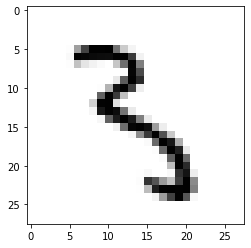

In [120]:
all_values = data_list[228].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')
None

In [118]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# количество выходных узлов - 10 (пример)
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [110]:
# тренировка нейронной сети

# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети
epochs = 5
for е in range(epochs):
    # перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        # получить список значений, используя символы запятой (1,1)
        # в качестве разделителей
        all_values = record.split(',')
        # масштабировать и сместить входные значения
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0,01, за исключением
        # желаемого маркерного значения, равного 0,99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [111]:
# загрузить в список тестовый набор данных CSV-файла набора MNIST
test_data_file = open(folder_path + 'mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [112]:
# тестирование нейронной сети
# журнал оценок работы сети, первоначально пустой
scorecard = []
# перебрать все записи в тестовом наборе данных
for record in test_data_list:
    # получить список значений из записи, используя символы
    # запятой (*,1) в качестве разделителей
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    # масштабировать и сместить входные значения
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = np.argmax(outputs)
    # присоединить оценку ответа сети к концу списка
    if (label == correct_label) :
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети присоединить
        # к списку значение 0
        scorecard.append(0)
        pass
    pass

# рассчитать показатель эффективности в виде
# доли правильных ответов
scorecard_array = np.asarray(scorecard)
print ("эффективность = ", scorecard_array.sum() / scorecard_array.size)

эффективность =  0.9726
